In [62]:
#first i will load the libraries i need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

Data weangle:
1- Gathering Data

In [63]:
t_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
#importing twitter archive

In [64]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [65]:
#then reading the file contect to a list
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [66]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [67]:
#i will do a table 
tweet_data = pd.DataFrame(df_list, columns = {'id',
                                             'retweet_count',
                                             'favorite_count'})

In [68]:
tweet_data.head()

,favorite_count,retweet_count,id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [69]:
#i will change the id name so it's become clear
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [70]:
#save the table to a csv so i can use in the future
tweet_data.to_csv('tweet_data.csv', index=False)

In [71]:
#i will check if it save or not
x = pd.read_csv('tweet_data.csv')
x.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


2-Assessing Data

In [72]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [73]:
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1415,698703483621523456,NaN,NaN,2016-02-14 03:01:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
1041,743980027717509120,NaN,NaN,2016-06-18 01:33:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Geno. He's a Wrinkled Baklavian Velvee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743980027...,11,10,Geno,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Swagger. He's the Cleveland Browns amb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812781120...,10,10,Swagger,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,None,None,None,None
2056,671357843010908160,NaN,NaN,2015-11-30 15:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Tfw she says hello from the other side. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671357843...,9,10,None,None,None,None,None
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None


In [74]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [75]:
t_archive.rating_numerator.describe()#there is a 0!

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [76]:
t_archive[t_archive.rating_numerator <10].count()[0]
#that's not cool bec all dogs r cute

440

In [77]:
#i will catch the id that put rate under 10
t_archive[t_archive.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [78]:
#i'm trying to find who rate the dog 0
t_archive[t_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [79]:
t_archive.loc[313, 'text'] #great for @Lin_Manuel

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [80]:
t_archive[t_archive.rating_denominator !=10].count()[0]

23

In [81]:
t_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Sadie        8
the          8
Bailey       7
Buddy        7
an           7
Daisy        7
Toby         7
Jax          6
Scout        6
Bella        6
Koda         6
Dave         6
Oscar        6
Jack         6
Milo         6
Stanley      6
Rusty        6
Leo          6
Larry        5
          ... 
Tilly        1
Julius       1
Mitch        1
Pepper       1
Reptar       1
Dylan        1
Lizzie       1
Kanu         1
Harvey       1
Patch        1
Fabio        1
Lili         1
JD           1
Colin        1
Stormy       1
Robin        1
Baron        1
Kody         1
Pubert       1
Jackie       1
Dook         1
Noah         1
Ester        1
Horace       1
Filup        1
Marvin       1
Chubbs       1
Hamrick      1
Liam         1
Carper       1
Name: name, Length: 957, dtype: int64

rigt now i'm gonna asses the tweet image predictions

In [82]:
i_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
#i nees to separate the valus
i_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
i_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
882,698710712454139905,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,1,Samoyed,0.329895,True,shoji,0.165772,False,prison,0.103596,False
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/75511...,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True
1075,717047459982213120,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False
399,673686845050527744,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
1051,713919462244790272,https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg,1,Siberian_husky,0.463223,True,Eskimo_dog,0.389959,True,malamute,0.097963,True
949,704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,golden_retriever,0.857240,True,Labrador_retriever,0.135460,True,Tibetan_mastiff,0.001903,True
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True


In [84]:
#i wanna see how this photo was identified as a bathtub
i_predictions.loc[1312,'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [85]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')
#okay it's clear now

In [86]:
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Asessing the tweet data from twitter API

In [87]:
tweet_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [88]:
tweet_data.sample(10)

,favorite_count,retweet_count,tweet_id
1702,1945,418,680889648562991104
1071,4443,1217,739932936087216128
1039,4551,1231,743980027717509120
666,8740,2167,790337589677002753
867,4707,979,761745352076779520
1765,1731,478,678396796259975168
281,29684,7422,839239871831150596
1037,131075,79515,744234799360020481
782,11309,4532,775350846108426240
2221,656,319,668297328638447616


In [89]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


so after looking and using code i come out with this assessment:
A-Tidiness :
1-Dog stage data is separated into 4 columns
2-all data is related but divided into 3 separate tables

B-Quality :
(Enhanced twitter archive)
1- there are 181 retweets as indicated by retweetes_status_id
2-some dog names are invalid
3-invalid tweet_id data type
4-data type of the timestamp
5-440 rating less than 10
6-row 313 has 0 denominator
7-23 rating denominators not = 10
(Tweet image predictions)
8-missing data 



Data Cleaning

In [90]:
#creat a copy first
clean_t_archive = t_archive.copy()
clean_i_predictions = i_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [91]:
clean_t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [92]:
clean_i_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [93]:
clean_tweet_data.head(1)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193


clean the tidiness issues
define:
1-gathering the 4 columns into 1 i will call it dog_stage

In [94]:
#code:
clean_t_archive['dog_stage'] = clean_t_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [95]:
#code:
#i will drop it now
clean_t_archive = clean_t_archive.drop(columns=['doggo','floofer','pupper','puppo'])

In [96]:
#test
clean_t_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

define:
2-gathering all tables into 1 based on the tweet_id

In [97]:
#code:
clean_t_archive = pd.merge(clean_t_archive, clean_tweet_data, on='tweet_id', how='left' )
clean_t_archive = pd.merge(clean_t_archive, clean_i_predictions, on='tweet_id', how='left' )

In [98]:
#test
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

cleaning the quality issues
"not all the data will be cleaned since i will not use it for analysis"

define: this is for the first quality issue
1-delete rows that rep retweets and all related columns

In [99]:
#code:
clean_t_archive = clean_t_archive[clean_t_archive.retweeted_status_id.isnull()]
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
favorite_count                2175 non-null float64
retweet_count                 2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [100]:
#code:
#delete them
clean_t_archive = clean_t_archive.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [101]:
#test
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

define:the second issue
convert invalid names

In [102]:
#code
clean_t_archive.name = clean_t_archive.name.replace(regex=['^a[a-z]+', 'None'], value= np.nan)
#i wanna check of the numbers of null values now
sum(clean_t_archive.name.isnull())

689

In [103]:
#code
#i will write a function to extract names from text and return NaN if there is no 'named'
def function(text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) + 1
            return txt_list[name_index]
        else:
            pass
        return np.nan

In [104]:
clean_t_archive.name = np.where(clean_t_archive.name.isnull(), clean_t_archive.text.apply(function), clean_t_archive.name)


In [105]:
#test:
sum(clean_t_archive.name.isnull())
#names were added in the null value place

689

Define:
correct invalid data type by chaning tweer_id to string

In [106]:
#code
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)

In [107]:
#test
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1486 non-null object
dog_stage                364 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

Define
correct invald data type by chaning timestamp to datetime

In [108]:
#code
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)

In [109]:
#test
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1486 non-null object
dog_stage                364 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

define
delete rows woth missing pics

In [110]:
#code
clean_t_archive = clean_t_archive[clean_t_archive.jpg_url.notnull()]

In [111]:
#test
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1440 non-null object
dog_stage                326 non-null object
favorite_count           1994 non-null float64
retweet_count            1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

define
chaning _ to space

In [112]:
#code
clean_t_archive.p1 = clean_t_archive.p1.str.replace('_',' ')
clean_t_archive.p2 = clean_t_archive.p1.str.replace('_',' ')
clean_t_archive.p3 = clean_t_archive.p1.str.replace('_',' ')

In [113]:
#test
clean_t_archive.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [114]:
#test
clean_t_archive.p2.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p2, dtype: object

In [115]:
#test
clean_t_archive.p3.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p3, dtype: object

define
change lowercase letter to uppercase

In [116]:
#code
clean_t_archive.p1 = clean_t_archive.p1.str.title()
clean_t_archive.p2 = clean_t_archive.p1.str.title()
clean_t_archive.p3 = clean_t_archive.p1.str.title()

In [117]:
#test
clean_t_archive.p1.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper Towel
4                      Basset
5    Chesapeake Bay Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish Terrier
9                    Pembroke
Name: p1, dtype: object

In [118]:
#test
#chceking if the first letter in all words in p1 is uppercase
(clean_t_archive.p1.str.istitle()).value_counts()

True    1994
Name: p1, dtype: int64

In [119]:
#test
#chceking if the first letter in all words in p2 is uppercase
(clean_t_archive.p2.str.istitle()).value_counts()

True    1994
Name: p2, dtype: int64

In [120]:
#test
#chceking if the first letter in all words in p3 is uppercase
(clean_t_archive.p3.str.istitle()).value_counts()

True    1994
Name: p3, dtype: int64

define:
delete rows without retweet_count entries

#code
was deleted when cleaning other issues

In [121]:
#test
sum(clean_t_archive.retweet_count.isnull())

0

In [122]:
#storing the data
clean_t_archive.to_csv('twitter_archive_master.csv')

now i will start with the data analysis and visualization

In [123]:
#the percentage of the dog stages
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

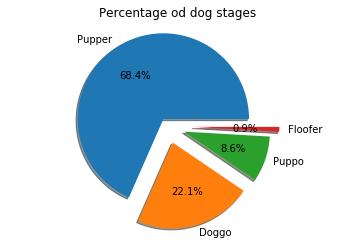

In [125]:
plt.pie(stage_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%',
       shadow=True,
       explode=(0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage od dog stages')
plt.axis('equal')

as you can see Pupper have the highest precentage and the Floofer have the lowest one

Text(0,0.5,'favorite count')

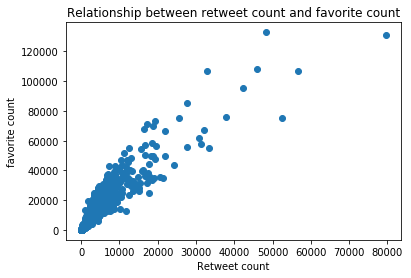

In [128]:
#let's check the relationship between retweet count and the fav count
plt.scatter(clean_t_archive.retweet_count, clean_t_archive.favorite_count)
plt.title('Relationship between retweet count and favorite count')
plt.xlabel('Retweet count')
plt.ylabel('favorite count')

so there is a liner relationship between them